In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nguyenconghuykkk","key":"990b0b8992440a436f025e3e3acc0f81"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d jessicali9530/lfw-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset
License(s): other


In [6]:
import zipfile
import os
import imghdr



<ipython-input-6-293653e9aeab>:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
# Chỉ định đường dẫn đến tệp zip
zip_path = '/content/lfw-dataset.zip'
# Giải nén nội dung của tệp zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('path_to_extract_to')  # Chỉ định đường dẫn giải nén

In [8]:
import os

dataset_path = "/content/path_to_extract_to/lfw-deepfunneled/lfw-deepfunneled"
num_images = sum([len(files) for _, _, files in os.walk(dataset_path)])

print(f"Số lượng hình ảnh trong dataset: {num_images}")


Số lượng hình ảnh trong dataset: 13233


In [9]:
import os
from collections import defaultdict

dataset_path = "/content/path_to_extract_to/lfw-deepfunneled/lfw-deepfunneled"
min_images = 5  # Số lượng ảnh tối thiểu để giữ lại

# Đếm số ảnh trong mỗi thư mục (tên diễn viên)
actor_images = defaultdict(int)

for actor in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor)
    if os.path.isdir(actor_path):
        actor_images[actor] = len(os.listdir(actor_path))

# Lọc ra danh sách diễn viên có đủ ảnh
valid_actors = {actor for actor, count in actor_images.items() if count >= min_images}

print(f"Số lượng diễn viên đủ ảnh: {len(valid_actors)}")


Số lượng diễn viên đủ ảnh: 423


In [10]:
import os
import shutil
import random

dataset_path = "/content/path_to_extract_to/lfw-deepfunneled/lfw-deepfunneled"
destination_path = "/content/filtered_dataset"  # Thư mục lưu dataset sau khi lọc
min_images = 5  # Chỉ chọn diễn viên có ít nhất 5 ảnh
num_actors_to_keep = 100  # Chỉ lấy 100 diễn viên

# Đếm số ảnh trong mỗi thư mục (tên diễn viên)
actor_images = {actor: len(os.listdir(os.path.join(dataset_path, actor)))
                for actor in os.listdir(dataset_path)
                if os.path.isdir(os.path.join(dataset_path, actor))}

# Lọc ra danh sách diễn viên có đủ ảnh (tối thiểu 5 ảnh)
valid_actors = [actor for actor, count in actor_images.items() if count >= min_images]

# Nếu số lượng diễn viên hợp lệ ít hơn 100, chọn toàn bộ, ngược lại chọn ngẫu nhiên 100 diễn viên
selected_actors = random.sample(valid_actors, min(num_actors_to_keep, len(valid_actors)))

# Tạo thư mục đích nếu chưa có
os.makedirs(destination_path, exist_ok=True)

# Sao chép ảnh của các diễn viên đã chọn
for actor in selected_actors:
    src_actor_path = os.path.join(dataset_path, actor)
    dest_actor_path = os.path.join(destination_path, actor)

    os.makedirs(dest_actor_path, exist_ok=True)

    for img in os.listdir(src_actor_path):
        src_img_path = os.path.join(src_actor_path, img)
        dest_img_path = os.path.join(dest_actor_path, img)
        shutil.copy(src_img_path, dest_img_path)  # Sao chép ảnh

print(f"✅ Đã lưu {len(selected_actors)} diễn viên vào thư mục: {destination_path}")


✅ Đã lưu 100 diễn viên vào thư mục: /content/filtered_dataset


In [11]:
import os

dataset_path = "/content/filtered_dataset"  # Thay đổi đường dẫn này thành thư mục dataset của bạn
num_images = sum([len(files) for _, _, files in os.walk(dataset_path)])

print(f"Số lượng hình ảnh trong dataset: {num_images}")

Số lượng hình ảnh trong dataset: 1938


In [12]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.3 MB/s eta 0:00:00


In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [14]:
img = cv.imread('/content/path_to_extract_to/lfw-deepfunneled/lfw-deepfunneled/AJ_Cook/AJ_Cook_0001.jpg')

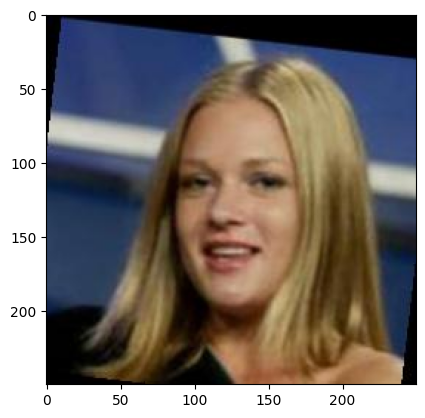

In [15]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB

In [16]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)
print(results)


[{'box': [89, 63, 88, 131], 'confidence': np.float64(0.9984436631202698), 'keypoints': {'nose': [np.int64(116), np.int64(136)], 'mouth_right': [np.int64(145), np.int64(159)], 'right_eye': [np.int64(147), np.int64(113)], 'left_eye': [np.int64(104), np.int64(114)], 'mouth_left': [np.int64(104), np.int64(158)]}}]


In [17]:
x,y,w,h = results[0]['box']

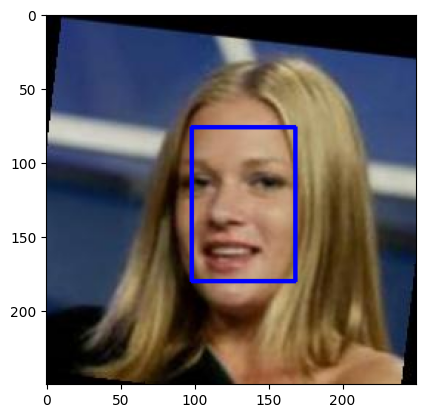

In [18]:

# Giả sử results[0]['box'] chứa các giá trị x, y, w, h
x, y, w, h = results[0]['box']

# Thu nhỏ khung chữ nhật bằng cách giảm độ rộng và độ cao
shrink_factor = 0.2  # Thay đổi tỷ lệ này để thu nhỏ hoặc phóng to khung
new_w = int(w * (1 - shrink_factor))
new_h = int(h * (1 - shrink_factor))

# Tính toán lại tọa độ để khung vẫn ở chính giữa khuôn mặt
new_x = x + (w - new_w) // 2
new_y = y + (h - new_h) // 2

# Vẽ khung chữ nhật mới
img = cv.rectangle(img, (new_x, new_y), (new_x + new_w, new_y + new_h), (0, 0, 255), 2)
plt.imshow(img)

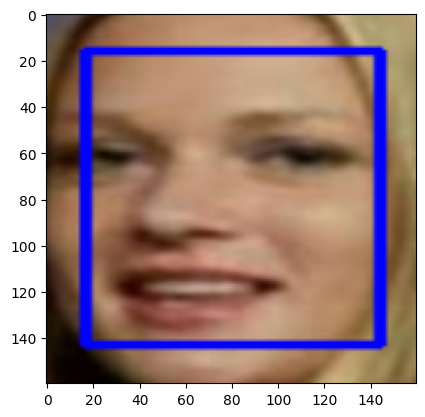

In [19]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

array([[[ 75,  80, 109],
        [ 76,  80, 108],
        [ 78,  81, 106],
        ...,
        [186, 165, 122],
        [186, 167, 122],
        [186, 168, 122]],

       [[ 79,  79, 104],
        [ 80,  79, 103],
        [ 82,  80, 100],
        ...,
        [183, 161, 117],
        [184, 165, 120],
        [185, 167, 121]],

       [[ 82,  78, 101],
        [ 83,  79,  99],
        [ 85,  79,  95],
        ...,
        [183, 160, 115],
        [183, 163, 118],
        [184, 166, 120]],

       ...,

       [[ 39,  23,   9],
        [ 36,  21,   8],
        [ 30,  16,   6],
        ...,
        [146, 122,  79],
        [141, 116,  74],
        [138, 113,  70]],

       [[ 41,  25,   9],
        [ 37,  22,   8],
        [ 31,  17,   5],
        ...,
        [143, 117,  77],
        [136, 108,  68],
        [132, 103,  64]],

       [[ 40,  24,   8],
        [ 37,  21,   7],
        [ 31,  17,   5],
        ...,
        [139, 114,  74],
        [132, 104,  65],
        [128,  98,  60]]], dtype=uint8)
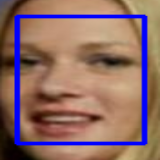

In [20]:
my_face

auto_processing

In [21]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [22]:
faceloading = FACELOADING("/content/filtered_dataset")
X, Y = faceloading.load_classes()

Loaded successfully: 5
Loaded successfully: 9
Loaded successfully: 9
Loaded successfully: 9
Loaded successfully: 530
Loaded successfully: 19
Loaded successfully: 5
Loaded successfully: 5
Loaded successfully: 11
Loaded successfully: 5
Loaded successfully: 6
Loaded successfully: 20
Loaded successfully: 5
Loaded successfully: 26
Loaded successfully: 5
Loaded successfully: 9
Loaded successfully: 11
Loaded successfully: 29
Loaded successfully: 9
Loaded successfully: 8
Loaded successfully: 9
Loaded successfully: 7
Loaded successfully: 5
Loaded successfully: 5
Loaded successfully: 6
Loaded successfully: 9
Loaded successfully: 8
Loaded successfully: 17
Loaded successfully: 109
Loaded successfully: 5
Loaded successfully: 5
Loaded successfully: 11
Loaded successfully: 5
Loaded successfully: 10
Loaded successfully: 5
Loaded successfully: 5
Loaded successfully: 7
Loaded successfully: 236
Loaded successfully: 5
Loaded successfully: 5
Loaded successfully: 5
Loaded successfully: 9
Loaded successfully

facenet

In [23]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=6362179f012f36dc33e8ecf358e794f0dbbf85bd0a25766886fe7da0348a00dd
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [24]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [25]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━

In [26]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

smv

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

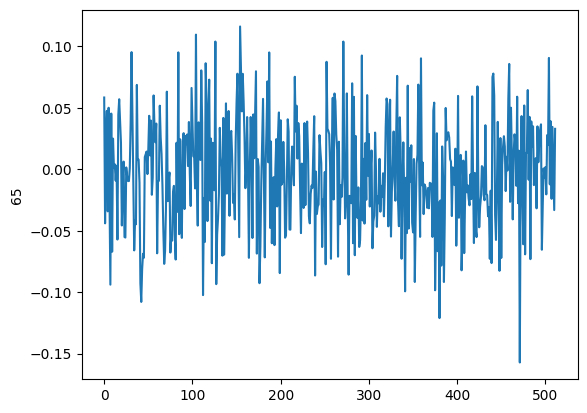

In [28]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])
plt.show()

In [29]:
Y

array([65, 65, 65, ...,  2,  2,  2])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y,  test_size=0.2,shuffle=True, random_state=17)

In [31]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', probability=True, decision_function_shape='ovr')
model.fit(X_train, Y_train)

SVC(probability=True)

In [32]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [38]:
y_pred = model.predict(X_test)

In [40]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.9432989690721649


In [43]:
print("Precision:", metrics.precision_score(Y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(Y_test, y_pred, average='macro'))

Precision: 0.9360460577673693
Recall: 0.8991910866910866


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
print("Classification Report:\n", metrics.classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         2
          15       1.00      0.95      0.97        39
          17       1.00      1.00      1.00         4
          18       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         2
          21       1.00      1.00      1.00         1
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
from sklearn.model_selection import GridSearchCV


# defining parameter range
param_grid = [
    {'C': [0.1, 1, 10, 50, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 50, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001], 'kernel': ['poly'], 'degree': [2, 3, 4]}
]


grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 5)

# fitting the model for grid search
grid.fit(X_train, Y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.348 total time=   2.6s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.355 total time=   2.1s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.371 total time=   2.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.371 total time=   2.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.345 total time=   2.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.584 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.581 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.584 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.474 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.474 total time=   0.6s
[CV 3/5] END ......C=0.1, ga

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 50, 100, 1000],
                          'gamma': [10, 1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 50, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [10, 1, 0.1, 0.01, 0.001],
                          'kernel': ['poly']}],
             verbose=3)

In [49]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=50, gamma=0.1)


In [52]:

from sklearn.metrics import classification_report

grid_predictions = grid.predict(X_test)

# In classification report
print(classification_report(Y_test, grid_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         5
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         2
          15       0.97      0.95      0.96        39
          17       1.00      1.00      1.00         4
          18       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         2
          21       1.00      1.00      1.00         1
          22       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)

test image

In [54]:
# Load model SVM
model_path = "/content/svm_model_160x160.pkl"
svm_model = pickle.load(open(model_path, 'rb'))

# Load embeddings & encoder
data_path = "/content/faces_embeddings_done_4classes.npz"
faces_embeddings = np.load(data_path)
Y = faces_embeddings['arr_1']

encoder = LabelEncoder()
encoder.fit(Y)

# Khởi tạo MTCNN và FaceNet
detector = MTCNN()
facenet = FaceNet()

In [56]:
# Load ảnh kiểm tra
image_path = "/content/Fiona Gallagher Icon.jpg"  # Thay bằng đường dẫn ảnh của bạn
t_im = cv.imread(image_path)
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)

# Phát hiện khuôn mặt
faces = detector.detect_faces(t_im)

if len(faces) == 0:
    print("Không tìm thấy khuôn mặt nào trong ảnh.")
else:
    x, y, w, h = faces[0]['box']
    x, y = max(0, x), max(0, y)  # Đảm bảo tọa độ không âm

    # Cắt và resize khuôn mặt
    face_img = t_im[y:y+h, x:x+w]
    face_img = cv.resize(face_img, (160, 160))
    face_img = np.expand_dims(face_img, axis=0)

    # Trích xuất đặc trưng
    test_embedding = facenet.embeddings(face_img)

    # Dự đoán bằng SVM
    ypreds = svm_model.predict(test_embedding)
    predicted_name = encoder.inverse_transform(ypreds)[0]

    # Tính độ chính xác
    proba = svm_model.predict_proba(test_embedding)
    confidence = max(proba[0])

    print(f"Dự đoán: {predicted_name} (Độ chính xác: {confidence:.2f})")
    if confidence < 0.4:
        print("=> Kết quả không chắc chắn, có thể là Unknown.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Dự đoán: George_W_Bush (Độ chính xác: 0.41)
